In [2]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist, euclidean
from utils import normal_distance_eval

STEP_TIME = 0.064

## Leader and follower paths

<IPython.core.display.Javascript object>


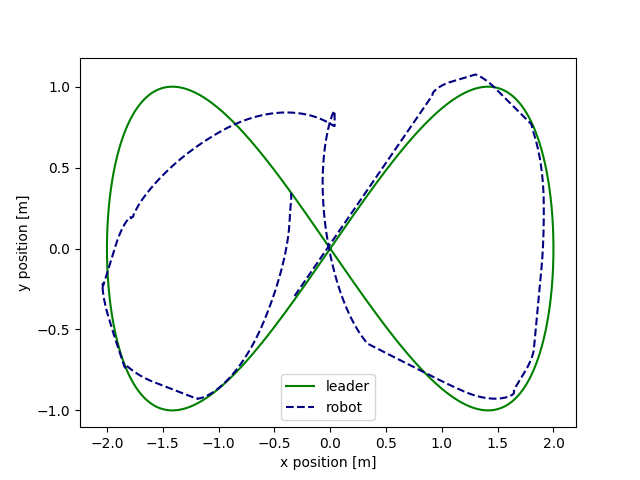

In [38]:
files = ['rgv_cv10_cr20_dr10', 'rgv_cv20_cr20_dr05', 'rgv_cv20_cr20_dr10', 'rgv_cv20_cr35_dr10', \
        'rgv_cv20_cr5_dr05', 'rgv_cv35_cr20_dr10']
for file in files:
    plt.clf()
    data = pd.read_csv("simulations_records/" + file + ".csv") 
    data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
    data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

    plt.xlabel('x position [m]')
    plt.ylabel('y position [m]')
    plt.plot(data['subject_z'], data['subject_x'], label='leader', color='g')
    plt.plot(data['robot_z'], data['robot_x'], label='robot', color='navy', linestyle='--')
    plt.legend()
    plt.savefig(file + '.eps', format='eps')
    plt.show()

## Normal path deviation

<IPython.core.display.Javascript object>


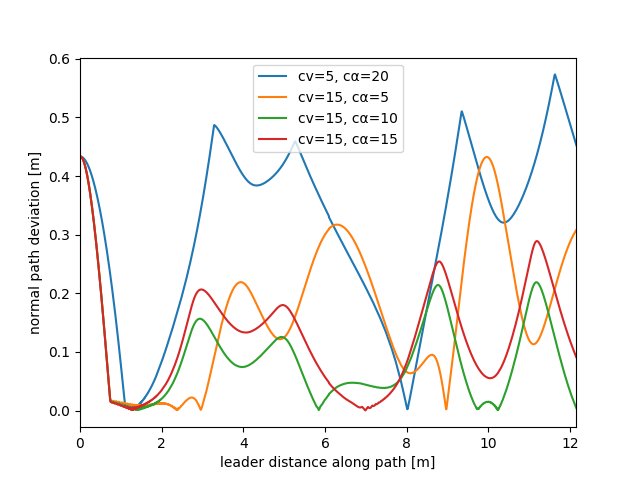

In [6]:
# files = ['rgv_cv10_cr20_dr10', 'rgv_cv20_cr20_dr05', 'rgv_cv20_cr20_dr10', 'rgv_cv20_cr35_dr10', \
#         'rgv_cv20_cr5_dr05', 'rgv_cv35_cr20_dr10']
files = [('ft_a2_n1500_cv5_cr20', 'cv=5, cα=20'),('ft_a2_n1500_cv15_cr5', 'cv=15, cα=5'), ('ft_a2_n1500_cv15_cr10', 'cv=15, cα=10'), ('ft_a2_n1500_cv15_cr15', 'cv=15, cα=15')]
plt.clf()
for f, l in files:
    data = pd.read_csv("simulations_records/" + f + ".csv") 
    data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
    data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])
    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data['subject_z'])
    lx = np.array(data['subject_x'])
    leader_coords = np.array(list(zip(lz, lx)))

    leader_path_cum_length = [0]

    for i in range(1, len(leader_coords)):
        dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
        leader_path_cum_length.append(leader_path_cum_length[i-1] + dist)

    robot_dist_to_leader_path = normal_distance_eval(robot_coords, leader_coords)
    distance_score = np.trapz(robot_dist_to_leader_path, leader_path_cum_length)

    plt.plot(leader_path_cum_length, robot_dist_to_leader_path, label=l)
    plt.ylabel('normal path deviation [m]')
    plt.xlabel('leader distance along path [m]')
    plt.xlim((0, 12.15))
    plt.legend()
#     print(f)
#     print('Max distance to leader:', np.max(robot_dist_to_leader_path[200:]))
#     print('Total distance to leader:', distance_score)
    
plt.savefig('ft_npd_comparison.eps', format='eps')

In [ ]:
files = [('ft_a2_n1500_cv15_cr10.csv', 'Follow and Turn'), ('rg_a2_n1500_cv20_cr20_bv10_dtoff10.csv', 'Rotate and Go')]
for f_name, label in files:
    data = pd.read_csv("simulations_records/" + f_name) 
    data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
    data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])
    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data['subject_z'])
    lx = np.array(data['subject_x'])
    leader_coords = np.array(list(zip(lz, lx)))

    leader_path_cum_length = [0]

    for i in range(1, len(leader_coords)):
        dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
        leader_path_cum_length.append(leader_path_cum_length[i-1] + dist)

    robot_dist_to_leader_path = normal_distance_eval(robot_coords, leader_coords)
    distance_score = np.trapz(robot_dist_to_leader_path, leader_path_cum_length)

    plt.plot(leader_path_cum_length, robot_dist_to_leader_path, label=label)
    plt.ylabel('normal path deviation [m]')
    plt.xlabel('leader distance along path [m]')
    plt.xlim((0, 12.15))
    plt.legend()
    print('Total distance to leader:', distance_score)
    
plt.savefig('ft_vs_rg_npd.eps', format='eps')
plt.show()

In [ ]:
data['time'].head()

## Robot-Leader distance
Measure the euclidean distance between the robot and the leader over time

In [ ]:
files = [('ft_a2_n1500_cv15_cr15.csv', 'Follow and Turn'), ('rg_a2_n1500_cv20_cr20_bv10_dtoff10.csv', 'Rotate and Go')]
plt.clf()
for f_name, label in files:
    data = pd.read_csv("simulations_records/" + f_name) 
    data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
    data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])

    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data['subject_z'])
    lx = np.array(data['subject_x'])
    leader_coords = np.array(list(zip(lz, lx)))
    
    distances = [euclidean(a,b) for a, b in zip(robot_coords, leader_coords)]

    plt.xlim((0, 105))
    plt.ylim((0.3, 1.2))
    plt.ylabel('Distance between robot and leader [m]')
    plt.xlabel('Time [s]')
    plt.plot(np.arange(0.0, STEP_TIME * len(robot_coords), STEP_TIME), distances, label=label)
    plt.legend()
    print(label)
    print(np.max(distances))
    print(np.std(distances))
    print(np.mean(distances))

plt.savefig('ft_vs_rg_dist.eps', format='eps')

<IPython.core.display.Javascript object>


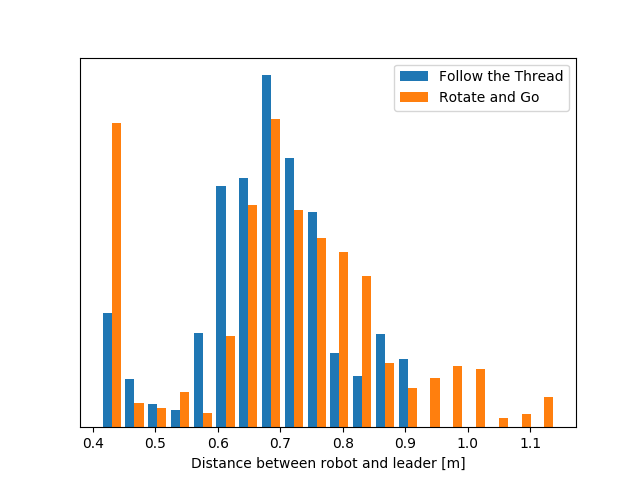

In [5]:
# Plot histograms
plt.clf()
files = [('ft_a2_n1500_cv15_cr15.csv', 'Follow and Turn'), ('rg_a2_n1500_cv20_cr20_bv10_dtoff10.csv', 'Rotate and Go')]
hists = []
for f_name, label in files:
    data = pd.read_csv("simulations_records/" + f_name) 
    data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
    data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])

    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data['subject_z'])
    lx = np.array(data['subject_x'])
    leader_coords = np.array(list(zip(lz, lx)))
    
    distances = [euclidean(a,b) for a, b in zip(robot_coords, leader_coords)]
    hists.append(distances)

plt.hist(hists, bins = 20, label=['Follow the Thread', 'Rotate and Go'])
# plt.ylabel('Count')
plt.xlabel('Distance between robot and leader [m]')
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.legend()
plt.savefig('ft_vs_rg_dist_histogram.eps', format='eps')

## Leader/Robot speed
Calculate and compare the speed of the leader and the robot over time

In [ ]:
TIME_STEPS = 5
TIME_INTERVAL = STEP_TIME * TIME_STEPS # seconds

data = pd.read_csv('simulations_records/ft_a2_n1500_cv5_cr20.csv') 
data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

rz = np.array(data['robot_z'])
rx = np.array(data['robot_x'])
robot_coords = np.array(list(zip(rz, rx)))

lz = np.array(data['subject_z'])
lx = np.array(data['subject_x'])
leader_coords = np.array(list(zip(lz, lx)))

vs_robot = []
vs_leader = []
for i in np.arange(1, len(leader_coords), TIME_STEPS):
    r_dist = np.linalg.norm(robot_coords[i] - robot_coords[i-1])
    l_dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
    vs_robot.append(r_dist/TIME_INTERVAL)
    vs_leader.append(l_dist/TIME_INTERVAL)

# Fill gap left by a bug in the simulation
vs_leader[150] = (vs_leader[149] + vs_leader[151]) / 2
vs_robot[150] = (vs_robot[149] + vs_robot[151]) / 2

v_len = len(vs_robot)
plt.plot(np.arange(0.0, TIME_INTERVAL * v_len, TIME_INTERVAL), vs_robot, label='robot')
plt.plot(np.arange(0.0, TIME_INTERVAL * v_len, TIME_INTERVAL), vs_leader, label='leader')
plt.legend()
plt.ylim((0, 0.07))
plt.xlim((-1, 110))
plt.xlabel('time [s]')
plt.ylabel('speed [m/s]')
plt.savefig('ft_cv5_cr20_leader_robot_speed.eps', format='eps')
plt.show()

In [ ]:
TIME_INTERVAL